# Assignment

First to access the GCT file we will have to import cmapPy.

In [1]:
import cmapPy
from cmapPy.pandasGEXpress.parse import parse

df= cmapPy.pandasGEXpress.parse.parse(r"C:\Users\sagar\Downloads\PAAD.gct", convert_neg_666=True, rid=None, cid=None, ridx=None, cidx=None, row_meta_only=False, col_meta_only=False, make_multiindex=False)
print(df)

GCT1.3
src: C:\Users\sagar\Downloads\PAAD.gct
data_df: [18465 rows x 183 columns]
row_metadata_df: [18465 rows x 0 columns]
col_metadata_df: [183 rows x 124 columns]


Taking the gene expression data in two dimentional dataframe.

In [2]:
pf= df.data_df
pf["aab8-Primary solid Tumor"]

rid
SLC35E2       8.0
A1BG          5.8
A1CF          5.1
A2BP1         NaN
A2LD1         7.5
             ... 
ZYG11B        9.4
ZYX          12.5
ZZEF1         9.7
ZZZ3          9.3
psiTPTE22     6.4
Name: aab8-Primary solid Tumor, Length: 18465, dtype: float32

Taking the meta data in two dimentional dataframe.

In [43]:
mf=df.col_metadata_df
mf['histological_type_other']

cid
aab1-Primary solid Tumor          invasive adenocarcinoma
aab4-Primary solid Tumor    invasive, well-differentiated
aab6-Primary solid Tumor                              NaN
aab8-Primary solid Tumor                              NaN
aab9-Primary solid Tumor                              NaN
                                        ...              
a89d-Solid Tissue Normal                              NaN
a89d-Primary solid Tumor                              NaN
a8sy-Primary solid Tumor                              NaN
a8lh-Primary solid Tumor                              NaN
aapl-Primary solid Tumor                              NaN
Name: histological_type_other, Length: 183, dtype: object

Now we will check NaN values in our Gene expression data.

In [4]:
pf.isnull().values.any()

True

Finding no of null values in the data set.

In [5]:
pf.isnull().sum().sum()

134954

In [6]:
pf.columns

Index(['aab1-Primary solid Tumor', 'aab4-Primary solid Tumor',
       'aab6-Primary solid Tumor', 'aab8-Primary solid Tumor',
       'aab9-Primary solid Tumor', 'aaba-Primary solid Tumor',
       'aabe-Primary solid Tumor', 'aabf-Primary solid Tumor',
       'aabh-Primary solid Tumor', 'aabi-Primary solid Tumor',
       ...
       'aauh-Primary solid Tumor', 'aaui-Primary solid Tumor',
       'aaul-Primary solid Tumor', 'a8t3-Primary solid Tumor',
       'a8t5-Primary solid Tumor', 'a89d-Solid Tissue Normal',
       'a89d-Primary solid Tumor', 'a8sy-Primary solid Tumor',
       'a8lh-Primary solid Tumor', 'aapl-Primary solid Tumor'],
      dtype='object', name='cid', length=183)

Printing genes who have NaN value in a sample.

In [7]:
gf=pf.loc[pf["aab8-Primary solid Tumor"].isnull()]
gf

cid,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,...,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
rid,,,,,,,,,,,,,,,,,,,,,
A2BP1,-1.0,1.1,NaN,NaN,0.1,NaN,NaN,1.7,0.4,-1.5,...,3.5,1.3,-0.3,NaN,2.1,2.0,0.0,NaN,2.0,NaN
ABCA17P,1.0,3.0,1.8,NaN,1.7,2.9,4.6,2.4,2.4,3.9,...,1.6,1.6,1.1,2.2,2.1,2.3,1.4,2.4,3.1,2.2
ABRA,NaN,NaN,NaN,NaN,1.1,-0.7,-0.7,2.0,-1.2,-1.5,...,2.9,0.0,-1.3,0.1,0.8,NaN,NaN,NaN,NaN,0.2
ACCN1,0.5,2.3,2.0,NaN,2.4,NaN,1.6,2.5,1.6,-1.5,...,3.2,2.7,0.3,1.4,2.4,1.0,3.0,0.2,1.1,NaN
ACSM2A,NaN,NaN,NaN,NaN,NaN,-0.7,NaN,0.5,NaN,NaN,...,-0.9,-1.0,-1.3,NaN,NaN,-1.0,0.0,NaN,-1.2,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF705A,NaN,NaN,NaN,NaN,NaN,-0.7,-0.7,0.1,-1.2,NaN,...,NaN,NaN,NaN,NaN,0.3,NaN,NaN,NaN,NaN,NaN
ZNF878,0.5,2.1,1.2,NaN,1.7,2.6,0.9,0.8,2.0,-0.5,...,1.9,2.3,1.1,1.4,1.8,2.0,0.6,0.8,1.6,2.0
ZNF99,0.0,NaN,NaN,NaN,NaN,-0.7,-0.7,-0.5,-1.2,NaN,...,NaN,NaN,-1.3,-0.9,0.3,0.0,NaN,-0.8,NaN,NaN


Removing the NaN values.

In [8]:
for i in pf.columns:
    gf=pf.loc[pf[i].isnull()]
    pf=pf.drop(gf.index)

Dimension after dropping NaN values

In [9]:
pf.shape

(14098, 183)

In [ ]:
Checking if there is any null value left or not.

In [10]:
pf.isnull().values.any()


False

In [11]:
pf.isnull().sum().sum()

0

In [12]:
pf

cid,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,...,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
rid,,,,,,,,,,,,,,,,,,,,,
SLC35E2,7.45,8.1,7.2,8.0,7.65,8.1,8.2,8.2,7.55,8.45,...,8.45,7.95,8.3,8.05,8.2,7.25,7.4,7.35,7.2,9.05
A1BG,6.40,5.8,6.4,5.8,6.70,6.6,6.3,6.5,5.70,6.30,...,7.10,7.10,6.7,7.00,6.9,7.10,7.3,7.90,6.0,6.90
A2LD1,7.50,6.8,7.3,7.5,7.40,6.6,7.1,6.8,8.00,5.80,...,6.50,7.30,6.1,6.70,6.5,6.70,6.7,6.50,6.9,6.70
A2M,14.30,14.0,13.1,13.8,14.60,13.3,13.4,14.2,13.90,11.90,...,14.50,14.30,14.5,14.20,14.3,14.90,14.5,13.00,12.1,13.30
A4GALT,10.60,10.2,10.1,8.6,10.10,9.3,9.5,8.4,8.40,7.90,...,9.10,9.50,10.0,9.50,9.1,10.50,9.8,10.80,8.3,9.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZXDC,9.90,10.0,10.0,9.7,9.90,10.6,10.1,9.9,9.80,10.70,...,10.10,10.10,9.9,10.10,9.8,9.50,9.5,9.40,9.5,10.40
ZYG11B,9.20,9.3,9.4,9.4,9.30,9.9,9.1,9.5,8.90,8.30,...,9.70,9.20,9.5,9.50,9.4,9.40,9.6,9.20,8.3,9.50
ZYX,12.90,12.4,13.5,12.5,13.00,12.2,12.9,12.6,12.70,12.50,...,12.40,12.60,13.5,12.50,12.7,13.60,13.1,13.20,12.3,12.30


In [ ]:
Now we will make heatmap of the data to know more about it.

In [13]:

import matplotlib.pyplot as plt
import seaborn as sns

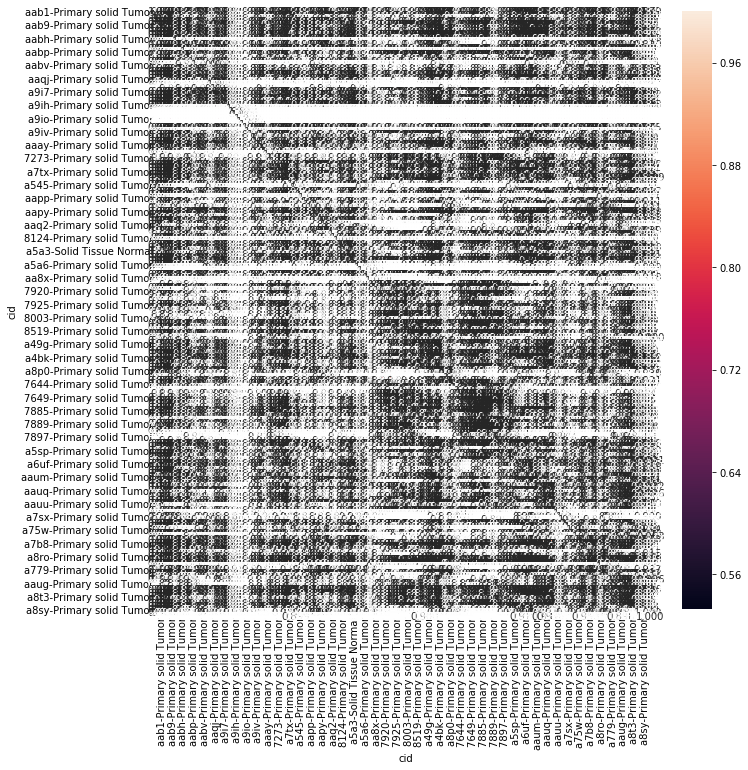

In [14]:

f,ax=plt.subplots(figsize=(11,11))
sns.heatmap(pf.corr(),annot=True,linewidths=.5, fmt='.03f',ax=ax)
plt.show()

![](Screenshot(62).png)

Now i used Phantus to plot some graph and found such behaviour as shown in the image below.
I overlayed the ‘histological_type_other’ column n the data set and found that Neuroendocrine tumors can 
be deperated out from the data set as they cluster away from the Exocrine (adenocarcinoma) tumors.

 ![](Screenshot(62).png)

![](pg.png)

<img src="pg.png">

Now apllying PCA to have better understanding about the data and it's behaviour.

In [20]:
from sklearn.decomposition import PCA 
  
pca = PCA(n_components = 2) 

In [21]:
ptf = pca.fit_transform(pf)

In [22]:
ptf.shape

(14098, 2)

In [23]:
explained_variance = pca.explained_variance_ratio_ 

Finding the varience of PCA.

In [24]:
explained_variance

array([0.86152681, 0.02193573])

Now we will try to visualize the data using PCA.

In [29]:
import numpy as np

In [36]:
X1, X2 = np.meshgrid(np.arange(start = ptf[:, 0].min() - 1, 
                     stop = ptf[:, 0].max() + 1, step = 0.01), 
                     np.arange(start = ptf[:, 1].min() - 1, 
                     stop = ptf[:, 1].max() + 1, step = 0.01))

In [37]:
X1p=ptf[:,0]
X2p=ptf[:,1]

In [51]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

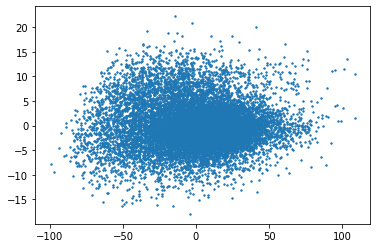

In [52]:
plt.scatter(X1p,X2p,s=2)

In [53]:
X1.max()

109.78749577734018